## Astro 304 "Galaxies"

### initial overdensity profiles of Gaussian peaks

### mass accretion history of collapsed halos

### density profile of collapsed halos

In [1]:
# setup notebook for inline figures
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

### Initial density profiles of peaks in Gaussian peaks

Real Gaussian peaks are generally ellipsoidal in shape, not spherical. Although, the rarest peaks are close to spherical.

Another difference of real peaks compared to the idealization of the spherical top-hat collapse model is presence of substructure within the peak in models like CDM. 

This substructure is due to the presence of fluctuations in the Gaussian field at all scales (down to $\sim $ Earth mass scale or even smaller). Thus, peaks are not smooth inside and their density is not constant. What is it? 

density contrast around a peak that collapses into $\approx 10^{12}\ M_\odot$ halo by $z=0$. 
<img width="500" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/MW/mr00048.png"></img>

We can compute average density profile of Gaussian peaks as follows  (<a href="http://adsabs.harvard.edu/abs/1986ApJ...304...15B">Bardeen et al. 1986</a>, <a href="http://adsabs.harvard.edu/abs/1987ApJ...318...15R">Ryden & Gunn 1987</a>, and <a href="http://adsabs.harvard.edu/abs/2010arXiv1010.2539D">Dalal et al. 2010</a>).

If we consider a peak of mass $M$ and radius $R$ and overdensity $\delta(<R)\equiv\delta_R$ within $R$, i.e. $M=(4\pi/3)(1+\delta_R)\bar{\rho}R^3$. Let's also define derivative of $\delta_R$ at $R$:

$$\delta^\prime_R=\frac{d\delta_R}{dr}.$$

Then, average profile $\bar{\delta}(<r)\equiv\bar{\delta}_r$ of peaks is given by the average over the conditional pdf of profiles $\delta_r$ of individual peaks:

$$\bar{\delta}(<r)=\langle p(\delta_r\vert \delta_R, \delta^\prime_R)\rangle=\langle X\vert Y\rangle = \langle XY\rangle\langle YY\rangle^{-1} Y,$$

where $X = \delta_r$ and $Y=[\delta_R,\delta^\prime_R]$. The variance of the profile is given by 

$$\sigma^2_{X\vert Y}=\langle XX\rangle - \langle XY\rangle\langle YY\rangle^{-1} \langle YX\rangle.$$

Here, specifically: 

$$\langle XX\rangle = \sigma^2(r)=\frac{1}{2\pi^2}\int P(k)\vert W_{\rm TH}(k,r)\vert^2 k^2 dk,\ \ \ W_{\rm TH}=\frac{3(\sin x - x\cos x)}{x^3};\ \ x\equiv kr.$$

$$\langle YX\rangle = \langle XY\rangle^T = \left[\langle\delta_r\delta_R\rangle,\langle\delta_r,\delta_R^\prime\rangle\right].$$

$$\langle\delta_r\delta_R\rangle = \frac{1}{2\pi^2}\int P(k)\vert W_{\rm TH}(k,r)W_{\rm TH}(k,R)\vert k^2 dk.$$

$$\langle\delta_r\delta^\prime_R\rangle = \frac{1}{2\pi^2}\int P(k)\vert W_{\rm TH}(k,r)\,\frac{\partial W_{\rm TH}}{\partial R}(k,R)\vert k^2 dk.$$

$$\langle YY\rangle=\left[\begin{matrix} 
\langle\delta_R^2\rangle & \langle\delta_R\delta_R^\prime\rangle \\
\langle\delta_R\delta^\prime_R\rangle& \langle\delta^{\prime 2}_R\rangle 
\end{matrix}\right]$$

Dotted line is an average profile of peaks in a Gaussian field with $\Lambda$CDM power spectrum smoothed on scale $M=2.6\times 10^{12}\ M_\odot$, and constrained to have the same derivative $\delta^\prime$ at $r=R_{\rm TH}$ as the profile that served as initial condition for a simulation of collapse of object of such mass. Shaded region shows rms fluctuation of the profiles around this mean. Note that profile does look like a tophat, although it does not cutoff abruptly at $R$, but rather rolls off smoothly. 

The black solid line shows the profile of an actual initial Gaussian peak that collapses into a $M\approx 10^{12}\ M_\odot$ halo in a simulation. We see that it looks like the above profile only at $r\approx R$, but not at smaller radii. 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/dpro_smooth_VL2.png" width="400"></img>

density contrast around a peak that collapses into $\approx 10^{12}\ M_\odot$ halo by current epoch in a cosmological simulation, shown at $z\approx 15$ and $z\approx 5$. (show movie)

We see that there are smaller sub-peaks within the large peak that collapse first and coalesce. Thus, the actual profile of the peak needs to take into account existence of these smaller peaks.

<table><tr><td><img width="400" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/MW/mr00048.png"></img></td>
<td><img width="400" align="center" src="http://astro.uchicago.edu/~andrey/classes/a304/fig/MW/mr00152.png"></img></tr></td></table>

### Supremum statistics profile

This is done using a clever idea presented by <a href="http://arxiv.org/abs/1010.2539">Dalal et al. (2010).</a> See also S 2.3.5 of the <a href="http://astro.uchicago.edu/~andrey/classes/a304s18/a304_galaxies_notes.pdf">notes</a>

The peaks smaller than $R$ have been smoothed in the field used to construct the average profile shown by dotted line, but they are actually present in the density field. Their density is higher than the mean density of the smoothed peak and they would thus collapse first, well before the collapse of the main
peak happens. Moreover, due to interactions between peaks and their mutual tidal forces, they are likely to merge into a single progenitor before the entire peak collapses. 

The density contrast profile can be computed for a given Gaussian field using supremum statistics. Although we will not go in details on this, the way to do this is described in Section 4 of <a href="http://adsabs.harvard.edu/abs/2010arXiv1010.2539D">Dalal et al. 2010</a> and in more detail in the notes). The profile shown by the solid blue line in the plot in the previous slide is computed using such supremum statistics. The code computing the profile can be found at the end of this notebook. 

The main point to remember is that *unsmoothed density profile of a peak in a Gaussian field can be computed from the linear Gaussian field itself.* By linear field here I mean the field that was linearly evolved in time (i.e., $D_+(z)\,\delta$). 

### Supremum statistics profile

If $x$ is a Gaussian random variable with pdf $p_{\rm G}(x)$ of zero mean and unit variance and we have $N$ samples $\{x_i\}$, the probability that a given $y$ is larger than any one $x_i$ is 
$$
P_1(y)=\int_{-\infty}^y\frac{dp_{\rm G}}{dx}dx = 1-\frac{1}{2}\mathrm{erfc}\left(\frac{y}{\sqrt{2}}\right),
$$

If we assume that $x_i$ samples are uncorrelated (which is not quite correct, so this is an approximation), the probability for $y$ to exceed all $N$ samples is:
$$
P_{\rm N}(y) = [P_1(y)]^N.
$$

When we consider radius $r$ of the peak profile, we can think of $N\approx (R/r)^3$ sub-peaks of radius $r$ fitting within $R$.  Thus, the probability to have a given $\bar{\delta}$ that is larger than central density of all Gaussian sub-peaks of radius $r$ is given by the above equation, in which $p(x)=p_{\rm G}(\bar{\delta}(<r/R) \vert \delta_R,\delta^\prime_R)$.

### Initial density profiles of peaks in Gaussian peaks

In this plot, the solid blue line shows the supremum profile computed this way. 
As we can see, it provides a good match to the actual density profile of the peak of such mass that was used as initial condition for the simulation. 

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/dpro_ex.png" width="400"></img>

### Density profile of Gaussian peak and *mass accretion history* (MAH) of collapsed halos

Let us represent an arbitrary overdensity profile of initial density peak by power law *locally*: 

$$
\delta_i(\leq r)= (M_i/M_*)^{-\epsilon}\propto r^{-3\epsilon},
$$

where logarithmic slope $3\epsilon(r)=d\ln \delta/d\ln r$ is a function of $r$, $M_i(<r_i)$ is the mass perturbation corresponding to the density perturbation and $M_*$ is just some specific physical mass scale (say, mass $M=M(\leq R)$ of the peak). 
 
In the following I will assume that $\delta_i$ has amplitude linearly extrapolated to $z=0$, so that its amplitude at any earlier redshift $z$ is $\delta=\delta_i D_+(z)$, where $D_+(z)$ is the linear growth factor normalized to unity at $z=0$. 


### Re-use the solution of the spherical collapse model!

Given that density profile decreases with increasing $r$, shells within $r$ have higher density and thus will collapse faster than shell with radius $r$. Thus, as this shell collapses, the mass within it stays constant because it cannot overtake any of the inner shells. The shells will only *cross* after this shell reaches $\approx R_{\rm f}$ - the current virial radius of the collapsed peak. 

Thus, *evolution of a given shell of radius $r_i$ is described by the same solution of $\ddot{r}=-GM(r)/r^2$ considered in the top-hat collapse model.*

So collapse of a given shell $r_i$ can be assumed to occur when its linearly extrapolated overdensity reaches the value $\delta_c\approx 1.68$: 

$$\delta_i(r_i)D_+(z)=\delta_c\ \ \mathrm{or}\ \ \ M(\leq r)=M_*\left(\frac{D_+(t)}{\delta_c}\right)^{1/\epsilon}.$$

 Taking time derivative of the mass profile gives
 
$$
\frac{dM}{dt}=\frac{1}{\epsilon}\frac{M_*}{\delta_c}\dot{D}_+\left(\frac{D_+}{\delta_c}\right)^{1/\epsilon-1},
$$

and

$$
\frac{d\ln M}{d\ln t}=\frac{t}{M}\frac{dM}{dt}=\frac{t}{\epsilon}\frac{\dot{D}_+}{D_+}.
$$


For $\Omega_{\rm m}=1$ cosmology in the matter-dominated regime: $D_+(t)=a(t)=(t/t_{\rm U})^{2/3}$, where $t_{\rm U}$ is the age of the universe, so that $\dot{D}_+/D_+=2/(3t)$, so the above equation gives $d\ln M/d\ln t=2/(3\epsilon)$.

This explicitly shows that *the rate of mass accretion at a given epoch is directly related to the slope of the initial density perturbation.* Shallower slopes, $\epsilon\ll 1$, in the inner radii of a density peak result in large accretion rate, while steep slopes of the outer profile at $r\sim R_{\rm TH}$ result in slower accretion rates. 

### Mass accretion history of collapsed halo from initial peak

Prediction of MAHs from the peak density profile compared to results of cosmological simulations

$$
\frac{dM}{dt}=\frac{1}{\epsilon}\frac{M_*}{\delta_c}\dot{D}_+\left(\frac{D_+}{\delta_c}\right)^{1/\epsilon-1},
$$

<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/mah_models.png" width="700" height="500"></img>



### Mass accretion history of collapsed halo from initial peak

The figure below shows the slope of the mass accretion history computed using initial *extremum density profile* of Gaussian peak shown in the previous plot - solid line:

$$
\frac{d\ln M}{d\ln t}=\frac{t}{M}\frac{dM}{dt}=\frac{t}{\epsilon}\frac{\dot{D}_+}{D_+}.
$$

compared to the mass accretion histories of peaks that collapse onto $M\approx 10^{12}\ M_\odot$ halo at $z=0$ measured in numerical cosmological simulations of nonlinear Gaussian peak collapse. 


<img src="http://astro.uchicago.edu/~andrey/classes/a304/fig/dlnMdlnt_models.png" width="500" height="500"></img>


Figure above showed comparison of prediction of mass accretion history (MAH) obtained from the spherical collapse model and $\epsilon(r)$ of the initial supremum profile of Gaussian peak to the results of fits to the actual MAHs obtained for halos of $M\approx 2\times 10^{12}\ M_\odot$ in cosmological simulations from <a href="http://adsabs.harvard.edu/abs/2012ApJ...753...16K">Feldmann (2013)</a> (see their section 1 and references therein):

$$
\left\langle\frac{dM}{dt}\right\rangle=1.06\times 10^{12}\, M_\odot\left(\frac{M}{10^{12}\,M_\odot}\right)^{1.14}\frac{\dot{D}_+(t)}{D_+(t)^2}, 
$$

and <a href="http://adsabs.harvard.edu/abs/2010MNRAS.406.2267F">Fakhouri et al (2010)</a>:

$$
\left\langle\frac{dM}{dt}\right\rangle=46.1\ M_\odot\,\mathrm{yr}^{-1}\left(\frac{M}{10^{12}\,M_\odot}\right)^{1.1}\times (1+1.11z)\sqrt{\Omega_{\rm m,0}(1+z)^3+\Omega_\Lambda}. 
$$

and <a href="http://adsabs.harvard.edu/abs/2015MNRAS.450.1521C">Correa et al. (2015)</a>

$$\left\langle\frac{dM}{dt}\right\rangle=71.6\ M_\odot\,\mathrm{yr}^{-1}\left(\frac{M}{10^{12}\,M_\odot}\right)\left(\frac{h}{0.7}\right) (0.75(1+z)-0.24)\sqrt{\Omega_{\rm m,0}(1+z)^3+\Omega_\Lambda}. 
$$

We can see that prediction from the simple peak collapse model matches results of cosmological simulations quite well. 

In [9]:
import code.galaxy_model as gm
from colossus.cosmology import cosmology
from scipy.integrate import odeint
from code.setup.setup import data_home_dir
import matplotlib.ticker as mtick

# define a vector of cosmological parameters of Via Lactea II cosmology:    
my_cosmo = {'flat': True, 'H0': 73.0, 'Om0': 0.238, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

def test_galaxy_evolution(Minit, sfrmodel, cosmo, verbose):
    zg = np.linspace(20., 0., 400) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gm.model_galaxy(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0],0.0,1.e100)
    Mgout = np.clip(Mout[:,1],0.0,1.e100)
    Msout = np.clip(Mout[:,2],0.0,1.e100)
    MZout = np.clip(Mout[:,3],0.0,1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

sfrmodel = "gaslinear"  

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=4.e8, sfrmodel=sfrmodel, cosmo=cosmo, 
                                                                 verbose=False)



In [22]:
from colossus.lss import peaks

#
# plot
#
tu = cosmo.age(0.0) # the age of the Universe

from scipy.interpolate import UnivariateSpline
# take output of the model above for MAH and construct splint of log(t)-log(Mh(t))
spl = UnivariateSpline(np.log(t_output), np.log(Mhout), s=0.)
# derivative of the spline
dspl = spl.derivative(n=1); 
# dlnM/dlnt 
dlnMdlnt = dspl(np.log(t_output))

# prepare fits to MAHs measured in cosmological simulations
x = t_output
# Fakhouri et al. (2010)
yf = 4.61e-2*x*(Mhout/1.e12)**0.1*(1.+1.11*zg)*np.sqrt(cosmo.Om0*(1.+zg)**3+1.0-cosmo.Om0)
yfmed = 2.53e-2*x*(Mhout/1.e12)**0.1*(1.+1.65*zg)*np.sqrt(cosmo.Om0*(1.+zg)**3+1.0-cosmo.Om0)
# Correa et al. 2015
M0 = 2.e12; lM0 = np.log10(M0)
ac = 1.686*np.sqrt(2./np.pi)*cosmo.growthFactor(0.0, derivative=1) + 1.0
zf = -6.4e-3*lM0*lM0 + 2.37e-2*lM0 + 1.8837; qc = 4.137/zf**0.9476
rM0 = peaks.lagrangianR(M0); rM0q = peaks.lagrangianR(M0/qc); z0 = 0.
fM0 = 1.0/np.sqrt(cosmo.sigma(rM0q,z0)-cosmo.sigma(rM0,z0))
fM0 = 0.8
# eq. 38 in Correa et al. 2015, Paper II
yc = 7.16e-2*x*(cosmo.h/0.7)*(0.75*(1.+zg)-0.24)*np.sqrt(cosmo.Om0*(1.+zg)**3+1.0-cosmo.Om0)

# read in the extremum density profile of initial Gaussian peak
r, dlpro = np.loadtxt(data_home_dir()+'delta_exval.dat', usecols=(0,1), unpack=True)

lrg = np.linspace(np.min(np.log10(0.75*r)),np.max(np.log10(1.2*r)),500); rg = 10.**lrg
rg = r; lrg = np.log10(r)
spls  = UnivariateSpline(np.log(r), np.log(dlpro), s=0., ext=3); 
splsi  = UnivariateSpline(np.log(dlpro[::-1]), np.log(r[::-1]), s=0., ext=0); 
dspls = spls.derivative(n=1); 
dspl = UnivariateSpline(cosmo.growthFactor(zg), t_output, s=0., ext=0)

#dprog = np.exp(spls(np.log(r)))
dlcoll = 1.69/cosmo.growthFactor(zg)
rcoll = np.exp(splsi(np.log(dlcoll)))
xt = dspl(1.69/dlpro);
gamma = dspls(np.log(r))
dspl = UnivariateSpline(t_output, cosmo.growthFactor(zg), s=0.)
dDdt = cosmo.growthFactor(zg, derivative=1) * cosmo.age(t_output, derivative=1, inverse=True)
dspld = UnivariateSpline(t_output, dDdt, s=0.)

# compute MAHs using initial extremum profile and spherical collapse model
mts = -xt/(gamma/3.)*dspld(xt)/dspl(xt)
mts2 = 2./(-gamma)
MTH = 1.92e12; nuTH = 1.6
zt = cosmo.age(xt, inverse=True)
at = 1.0/(1+zt)
#mtpeak2 = (1.+dlpro) * MTH * (cosmo.growthFactor(zt))**(-3./gamma)
#mtpeak2 = (1.+dlpro)*MTH * (at*nuTH)**(-3./gamma)
mtpeak2 = MTH * rcoll**3 #(1.0+np.exp(spls(np.log(rcoll)))) * rcoll**3 
#mtpeak = np.nan_to_num(mtpeak)
#mtpeak = np.clip(mtpeak,1.e-10,1.e100)


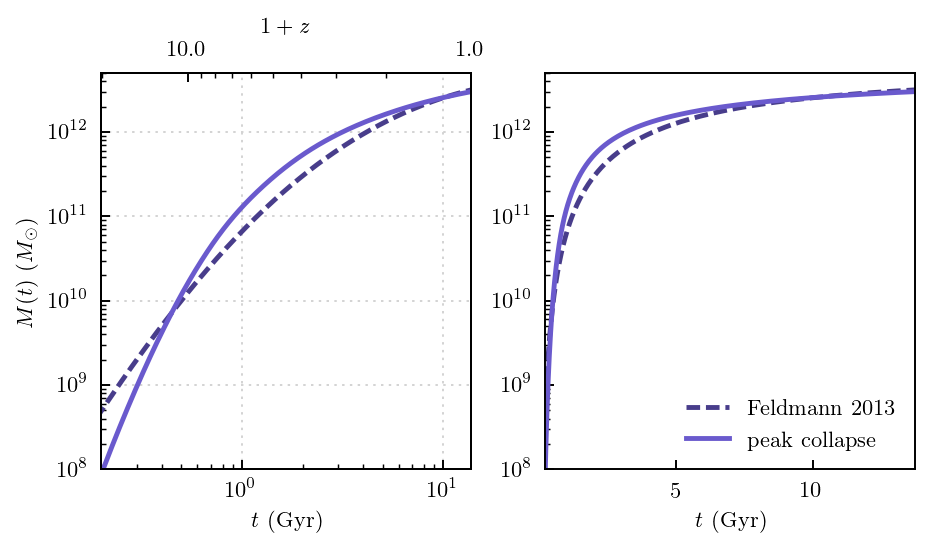

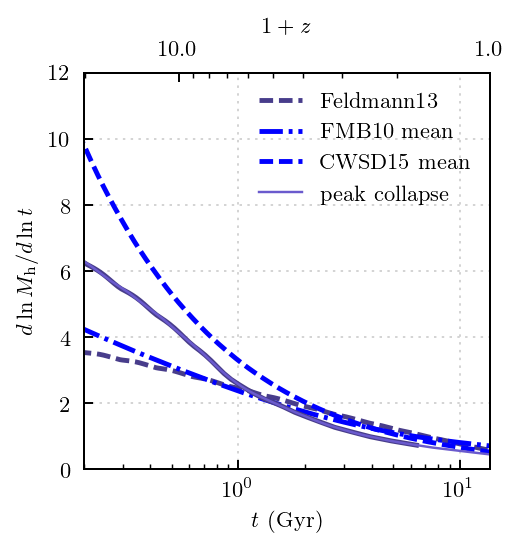

In [23]:
# plot comparison of M(t) = MAH

fig, ax = plt.subplots(1,2, figsize=(6,3))    
tmin = 0.2; tmax = tu; ylims = [1.e8, 5.e12]
ax[0].set_xlim(tmin,tmax); ax[0].set_ylim(ylims)
ax[0].set_xscale('log'); ax[0].set_yscale('log')
ax[0].set_xlabel(r'$t\ \rm (Gyr)$'); ax[0].set_ylabel(r'$M(t)\ (M_\odot)$')
# plot corresponding R scale at the top
ax2 = ax[0].twiny()
ax2.set_xscale('log')
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter(r'$%.1f$'))

zmin = 1.+cosmo.age(tmin, inverse=True); zmax = 1.+cosmo.age(tmax, inverse=True)
ax2.set_ylim(ylims); ax2.set_xlim(zmin, zmax)
ax2.set_xlabel(r'$1+z$')
ax[0].plot(t_output, Mhout, '--', c='darkslateblue', lw = 2.0, label=r'$\mathrm{KD12}$')
ax[0].plot(t_output, mtpeak2,  c='slateblue', lw = 2.0, label=r'$\mathrm{peak}$')
# Wechsler et al. (2002) fit to halo MAHs in simulations
af = 0.3
MW02 = 1.25e12 * np.exp(-2.*af*zg)
#ax[0].plot(t_output, MW02, ':', c='mediumslateblue', lw = 2.0, label=r'$M=M_0 e^{-2 a_fz}$')
ax[0].grid(ls=':', c='lightgray')
#
ax[1].set_xlim(tmin,tmax); ax[1].set_ylim(ylims)
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$t\ \rm (Gyr)$'); #ax[1].set_ylabel(r'$M(t)\ (M_\odot)$')
ax[1].plot(t_output, Mhout, '--', c='darkslateblue', lw = 2.0, label=r'$\mathrm{Feldmann\ 2013}$')
#ax[1].plot(xt, mtpeak2,  c='slateblue', lw = 2.0, label=r'$\mathrm{peak\  collapse}$')
ax[1].plot(t_output, mtpeak2,  c='slateblue', lw = 2.0, label=r'$\mathrm{peak\  collapse}$')

#ax[1].plot(t_output, MW02, ':', c='mediumslateblue', lw = 2.0, label=r'$M=M_0 e^{-2 a_fz}$')
ax[1].legend(frameon=False,loc='lower right', fontsize=9)
plt.savefig('fig/mah_models.png', bbox_inches='tight')
plt.show()

# plot comparison of dlnM/dlnt
fig, ax = plt.subplots(1,1, figsize=(3,3))    
tmin = 0.2; tmax = tu; ylims = [0., 12.]
ax.set_xlim(tmin,tmax); ax.set_ylim(ylims)
ax.set_xscale('log')
ax.set_xlabel(r'$t\ \rm (Gyr)$'); ax.set_ylabel(r'$d\ln M_{\rm h}/d\ln t$')
# plot corresponding R scale at the top
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter(r'$%.1f$'))

zmin = 1.+cosmo.age(tmin, inverse=True); zmax = 1.+cosmo.age(tmax, inverse=True)
ax2.set_ylim(ylims); ax2.set_xlim(zmin, zmax)
ax2.set_xlabel(r'$1+z$')

ax.plot(t_output, dlnMdlnt, '--', c='darkslateblue', lw = 2.0, label=r'$\mathrm{Feldmann 13}$')
ax.plot(x, yf, '-.', c='blue', lw = 2.0, label=r'$\mathrm{FMB10\ mean}$')
ax.plot(x, yc, '--', c='blue', lw = 2.0, label=r'$\mathrm{CWSD15\ mean}$')
ax.plot(xt, mts, '-', c='darkslateblue', lw = 2.0)
sspl = UnivariateSpline(np.log(t_output), np.log(mtpeak2), s=0.)
sspld = sspl.derivative(n=1)
ax.plot(t_output, sspld(np.log(t_output)), '-', c='slateblue', lw = 1, label=r'$\mathrm{peak\ collapse}$')
ax.grid(ls=':', c='lightgray')
ax.legend(frameon=False,loc='upper right', fontsize=9)

"""
ax.grid(which='major', c='gray')
for ymin in ax.yaxis.get_minorticklocs():
  ax.axhline(y=ymin,lw=0.25,ls=':',c='gray')   
for xmin in ax.xaxis.get_minorticklocs():
  ax.axvline(x=xmin,lw=0.25,ls=':',c='gray')   
"""

plt.savefig('fig/dlnMdlnt_models.png', bbox_inches='tight')
plt.show()

### Building a simple galaxy formation model

#### Accretion rate of dark matter and baryons 

Starting at some initial time $t_i$ (redshift $z_i$) and collapsed seed mass $M_i$, let's assume mass is accreted onto evolving object at the rate given by Feldmann (2013) above: 
$$\dot{M}=  1.06\times 10^{12}\ M_\odot  \left(\frac{M_{\rm h}}{10^{12}\ M_\odot}\right)^{1.14}\frac{\dot{D}_+}{D^2_+},
$$
where $D_+(t)$ is the linear growth factor for a given cosmology. 

Let's assume that this mass comes as a mix of dark matter and baryonic diffuse gas, with baryons having a mass fraction $f_{\rm b,acc}$, i.e. mass accretion rate of baryons is 

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$
where $f_{\rm b,uni}=\Omega_{\rm b}/\Omega_{\rm m}$ is "universal" baryon fraction (i.e., average over universe), while factor $f_{\rm b,in}$ allows for suppression of baryon accretion due to some physical process. In the simplest version we will assume that $f_{\rm b,in}=1$. 



### Building a simple galaxy formation model

#### Evolution of gas mass 

Let's assume that all baryons are accreted as diffuse gas and that the accreted gas is instantly accreted onto galaxy in the center of evolving halo. This means that equation of gas mass evolution in a galaxy can be written as: 

$$
\dot{M}_{\rm g}=\dot{M}_{\rm b,acc}$$

In such evolution accreted gas would just accumulate. However, we know that galaxies convert accreted gas into stars via star formation process. We will discuss this process in more detail, but for now let's just parametrize star formation rate on dimensional grounds as 

$$\dot{M}_\star =\frac{M_{\rm g}}{\tau_{\rm sf}}$$

where $\tau_{\rm sf}$ is called the *gas consumption timescale*. This ODE defines evolution of stellar mass. 

#### Evolution of gas mass accounting for star formation

When stars form they return some fraction of their mass to the interstellar medium on $<10^8$ yrs time scale due to stellar winds blown by massive stars during their evolution, AGB stars shedding envelopes, and SN ejecta. This is short compared to Gyr time scales of galaxy evolution. So we can assume that the a fraction of stellar mass $\mathcal{R}$ is returned instantly. This assumption is called the *instantaneous recycling approximation.* Then gas mass evolution equation is 

$$
\dot{M}_{\rm g}=\dot{M}_{\rm b,acc} - (1-\mathcal{R})\dot{M}_{\star}. $$


#### Evolution of heavy element mass 

In addition to return a fraction of mass to the ISM, young stars also synthesize and release new heavy elements (metals). The fraction of mass released in heavy elements is parameterized by the *yielf*, $y_{\rm Z}$ - fraction of mass of newly born stellar population that is returned to ISM in the form of metals. 

We can thus write equation for evolution of mass of metals in the ISM: 

$$\dot{M}_{\rm Z}= y_{\rm Z}(1-\mathcal{R})\dot{M}_{\star}$$

If we allow gas accreted from intergalactic medium to have some intrinsic *metallicity* $Z_{\rm IGM}$ then equation of evolution becomes: 

$$\dot{M}_{\rm Z}=Z_{\rm IGM}\dot{M}_{\rm g,acc} + y_{\rm Z}(1-\mathcal{R})\dot{M}_{\star}.$$


These equations can be numerically integrated as a system of ODEs. Such integration is implemented in <a href="https://github.com/a-kravtsov/a304s18/blob/master/code/galaxy_model.py"><tt>code/galaxy_model.py</tt></a>. 

Code below shows how a galaxy model can be set up and integrated and how to plot results. Integration is done for $M_i=2.1\times 10^8\ M_\odot$ at $z_i=20$, with $\mathcal{R}=0.46$, $\tau_{\rm sf}=2$ Gyrs, and $Z_{\rm IGM}=10^{-4}$. 

In [24]:
import code.galaxy_model as gm
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.045714, 'sigma8': 0.82, 'ns': 0.96}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)    

In [25]:
from scipy.integrate import odeint

def test_galaxy_evolution(Minit, sfrmodel, tausf, cosmo, verbose):
    zg = np.linspace(20., 0., 40) # grid of redshifts
    t_output = cosmo.age(zg) # and corresponding times

    # instantiate a galaxy model at t=tinit assuming a given star fromation model and cosmology
    g = gm.model_galaxy(t = t_output[0], Mh = Minit, Mg = None, Ms = None, MZ = None, 
                     sfrmodel = sfrmodel, tausf=tausf, cosmo = cosmo, verbose = verbose)
    
    # array of quantities to evolve with ODE solver
    y0 = np.array([g.Mh, g.Mg, g.Ms, g.MZ])
    # evolve y0 in time
    Mout = odeint(g.evolve, y0, t_output, rtol = 1.e-7, mxstep = 4000)
    
    # let's split the output into arrays with intuitive names
    Mhout = np.clip(Mout[:,0], 0.0, 1.e100)
    Mgout = np.clip(Mout[:,1], 0.0, 1.e100)
    Msout = np.clip(Mout[:,2], 0.0, 1.e100)
    MZout = np.clip(Mout[:,3], 0.0, 1.e100)

    return zg, t_output, Mhout, Mgout, Msout, MZout

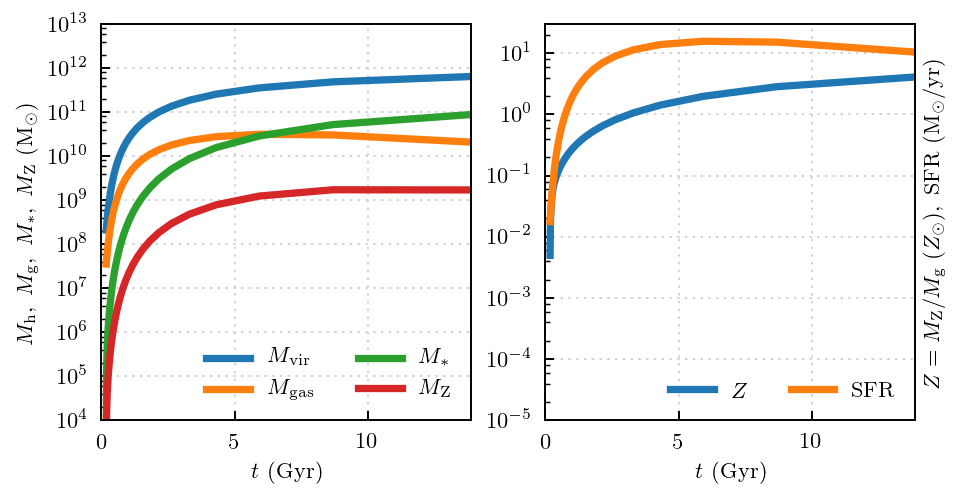

In [26]:
sfrmodel = "gaslinear" # star formation model; gaslinear is simply SFR=Mgas(t)/tau, where [tau]=[Gyrs] is constant 
tausf = 2. # gas consumption time scale in Gyrs
Zsun = 0.02 # solar metallicity

zg, t_output, Mhout, Mgout, Msout, MZout = test_galaxy_evolution(Minit=2.1e8, 
                                                                 sfrmodel=sfrmodel, 
                                                                 tausf=tausf, 
                                                                 cosmo=cosmo, 
                                                                 verbose=False)

#
# plot
#
tu = cosmo.age(0.0) # the age of the Universe

fig, ax = plt.subplots(1,2, figsize=(6,3))    
ax[0].set_xlabel(r'$t\ \rm (Gyr)$'); ax[0].set_ylabel(r'$M_{\rm h},\ M_{\rm g},\ M_{*},\ M_{\rm Z}\ (\rm M_\odot)$')
ax[0].set_xlim(0.,tu); ax[0].set_ylim(1.e4,1.e13)
ax[0].set_yscale('log')
ax[0].plot(t_output, Mhout, lw = 3.0, label=r'$M_{\rm vir}$')
ax[0].plot(t_output, Mgout, lw = 3.0, label=r'$M_{\rm gas}$')
ax[0].plot(t_output, Msout, lw = 3.0, label=r'$M_{\rm *}$')
ax[0].plot(t_output, MZout, lw = 3.0, label=r'$M_{\rm Z}$')

ax[0].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[0].grid(linestyle='dotted', c='lightgray')
    
# plot SFR and Z(t)
ax[1].set_xlabel(r'$t\ \rm (Gyr)$'); ax[1].set_ylabel(r'$Z= M_{\rm Z}/M_{\rm g}\ (Z_\odot),\rm\ SFR\ (M_\odot/yr)$')
ax[1].set_xlim(0.,tu); ax[1].set_ylim(1.e-5,30.)
ax[1].set_yscale('log')
ax[1].yaxis.set_label_position('right')


ax[1].plot(t_output, MZout/Mgout/0.02, lw = 3.0, label=r'$Z$')
SFR = np.zeros_like(t_output); 

for i, td in enumerate(t_output):
    ge = gm.model_galaxy(t = td, Mh = Mhout[i], Mg = Mgout[i], Ms = Msout[i], MZ = MZout[i], 
                         sfrmodel = sfrmodel, cosmo = cosmo)
    SFR[i] = ge.SFR(td)*1.e-9;

ax[1].plot(t_output,SFR, lw = 3.0, label=r'$\rm SFR$')
ax[1].legend(frameon=False,loc='lower right', ncol=2, fontsize=9)
ax[1].grid(linestyle='dotted', c='lightgray')
plt.show()


### Code to compute average profile of a Gaussian peak smoothed on a given scale. 

Calculation is based on the equations above (derived in <a href="http://adsabs.harvard.edu/abs/1986ApJ...304...15B">Bardeen et al. 1986</a>, <a href="http://adsabs.harvard.edu/abs/1987ApJ...318...15R">Ryden & Gunn 1987</a>, and <a href="http://adsabs.harvard.edu/abs/2010arXiv1010.2539D">Dalal et al. 2010</a>).

In [18]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
my_cosmo = {'flat': True, 'H0': 73.0, 'Om0': 0.238, 'Ob0': 0.045714, 'sigma8': 0.74, 'ns': 0.951}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('my_cosmo', my_cosmo)
cosmo.interpolation = True


In [19]:
from code.variances import delta_variance, dvar, ddvar, dddvar, ddddvar
from code.variances import dvars, ddvars, dddvars, ddddvars
from colossus.halo.mass_so import M_to_R
from colossus.lss import peaks
from time import clock

z = 0.0; rtol = 1.e-6

M200mVL2 = 1.92e12 
RTH = peaks.lagrangianR(M200mVL2*cosmo.h)
print "R200m = %.3f kpc at z = %.3f"%(M_to_R(M200mVL2*cosmo.h, z, '200m')/cosmo.h, z)
print "R_TH = %.3f comoving Mpc"%(RTH/cosmo.h)

#lr = np.arange(-3.0,np.log10(2.0*RTH),0.01)
lr = np.linspace(np.log10(1.e-3*RTH),np.log10(1.5*RTH),50)
r = 10.0**lr; rmin = 1.e-3

Y = np.zeros(2); 
delpk = 1.6*1.69
Y[0] = delpk; Y[1] = -6.5

YY = np.zeros((2,2))
YY[0,0] = delta_variance(RTH, RTH, func=dvars, rtol=rtol, cosmo=cosmo)
YY[0,1] = delta_variance(RTH, RTH, func=dddvars, rtol=rtol, cosmo=cosmo)
YY[1,0] = YY[0,1]
YY[1,1] = delta_variance(RTH, RTH, func=ddddvars, rtol=rtol, cosmo=cosmo) 
YYi = np.linalg.inv(YY)

sigB = cosmo.sigma(r, z=0., j=0)

XY = np.zeros(2); 
dlpro = np.zeros_like(r)
vardlpro = np.zeros_like(r)

for ir, rd in enumerate(r):
    var = delta_variance(rd, rd, func=dvars, rtol=rtol, cosmo=cosmo)
    vardd = delta_variance(rd, RTH, func=ddvars, rtol=rtol, cosmo=cosmo)
    varddd = delta_variance(rd, RTH, func=dddvars, rtol=rtol, cosmo=cosmo)
    
    #sigc = cosmo.sigma(rd, z, filt='tophat')
    XY[0] = vardd; XY[1] = varddd
    dlpro[ir] = np.dot(XY,np.dot(YYi,Y))
    vardlpro[ir] = var - np.dot(XY,np.dot(YYi,XY.T))
    #print("r = %.4e; M = %.4e; var = %.4e; varB = %.4e; vardd = %.4e; varddd = %.4e; dlin = %.4e; var = %.4e"%(rd, 
    #                                                                                              peaks.lagrangianM(rd), sigB[ir]**2, var, vardd, varddd, dlpro[ir], vardlpro[ir]))
    


R200m = 402.322 kpc at z = 0.000
R_TH = 2.353 comoving Mpc


Note that the xex extremum profile below can be computed once for all profiles and they reused for every one of them. 

In [20]:
from scipy.special import erfc
from code.variances import ex_mean

dlexpro = np.zeros_like(dlpro)
for ir, rd in enumerate(r):
    Nr = (RTH/rd)**3
    xex = 0.
    if Nr > 1:
        xex = ex_mean(Nr, rtol=1.e-8)
        dlexpro[ir] = xex*np.sqrt(vardlpro[ir]) + dlpro[ir]
    else:
        dlexpro[ir] = dlpro[ir]


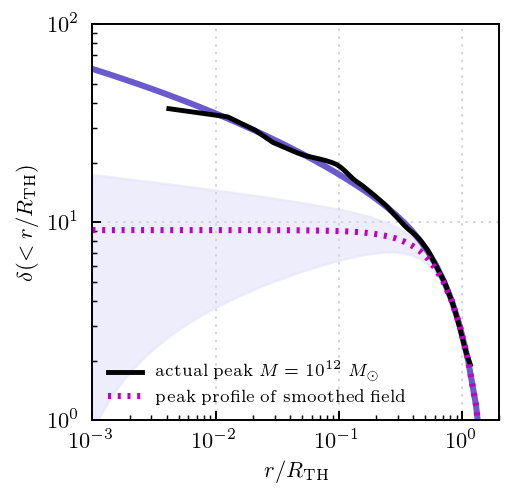

In [21]:
from code.setup.setup import data_home_dir

r2, dlpro_vl2   = np.loadtxt(data_home_dir()+'VL2_delta.dat', 
                             usecols=(0,1), unpack=True)

fig = plt.figure(figsize=(3.,3.))
plt.xlabel(r'$r/R_{\rm TH}$')
plt.ylabel(r'$\delta(<r/R_{\rm TH})$')
plt.xlim(1.e-3, 2.); plt.ylim(1.,1.e2)
plt.xscale('log'); plt.yscale('log')

sdlpro = np.sqrt(vardlpro[dlpro>0])
plt.fill_between(r[dlpro>0]/RTH, dlpro[dlpro>0]-sdlpro, dlpro[dlpro>0]+sdlpro, color='lavender', alpha=0.7), 
                #label=r'$variance$')
plt.plot(r[dlpro>0]/RTH, dlexpro[dlpro>0], lw=2.5, c='slateblue')

plt.plot(r2, dlpro_vl2,  c='black', lw=2.0, label=r'$\mathrm{actual\ peak}\ M=10^{12}\ M_\odot$') 

plt.plot(r[dlpro>0]/RTH, dlpro[dlpro>0],':', lw=2.5, c='m', 
         label=r'$\mathrm{peak\ profile\ of\ smoothed\ field}$')

plt.legend(frameon=False, loc='lower left', fontsize=7)
#plt.savefig('fig/dpro_smooth_VL2.png', bbox_inches='tight')
plt.savefig('fig/dpro_ex.png', bbox_inches='tight')
plt.grid(ls=':', c='lightgray')
plt.show()
